# TP 2 : arbres binaires

On a implémenté les arbres binaires avec la POO en créant deux classes : Noeud et Arbre.

Il est possible d'implémenter les arbres binaires avec des structures de données primitves comme les dictionnaires ou les listes.

## Implémentation avec des dictionnaires

On peut implémenter un arbre binaire avec des dictionnaires (plusieurs possibilités). Ici, on propose d'utiliser trois clefs :

- 'clef' qui contient la valeur du noeud de l'arbre;
- 'gauche' qui a pour valeur un dictionnaire contenant le fils gauche du noeud;
- 'droit' qui a pour valeur un dictionnaire contenant le fils droit du noeud;

### Remarque:

Deux approches différents sont possibles:
- On définit des arbres vides avec des dictionnaires vides ce qui implique que chaque dictionnaire a exactement 3 clefs. Dans ce cas on peut créer une fonction **est_vide** qui teste si un arbre est vide. 
- On définit des feuilles ce qui implique que le dictionnaire ne contient qu'une seule clef. Dans ce cas on peut créer une fonction **est_feuille** qui teste si l'arbre est une feuille.

On considère l'arbre binaire représenté ci-dessous est implémenté par le dictionnaire **arbre** :

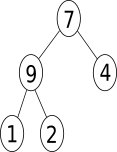

### Travail à réaliser

1. Écrire en python ce dictionnaire **arbre**.
2. Écrire en Python la fonction **taille** qui prend en paramètre un arbre binaire et renvoie le nombre de noeuds qu'il contient.
3. Faire de même avec la fonction **hauteur** et **niveau**.
4. Écrire en Python les fonctions de parcours en profondeur et en largeur d'un arbre binaire.

In [133]:
arbre={'clef':7, \
       'gauche':{'clef':9, \
                 'gauche':{'clef':1,'gauche':{},'droit':{}}, \
                 'droit':{'clef':2,'gauche':{},'droit':{}} }, \
       'droit':{'clef':4,'gauche':{},'droit':{}}}


def est_vide(arbre):
    return arbre == {}

def taille(arbre):
    if est_vide(arbre):
        return 0
    else:
        return 1 + taille(arbre['gauche'])+taille(arbre['droit'])

def hauteur(arbre):
    if est_vide(arbre):
        return -1
    else:
        return 1 + max(hauteur(arbre['gauche']), hauteur(arbre['droit']))
    
def niveau(arbre,p,noeuds=[]):
    if p == 0:
        if not est_vide(arbre):
            noeuds.append(arbre['clef'])
        return noeuds
    else:
        if not est_vide(arbre['gauche']):
            niveau(arbre['gauche'],p-1,noeuds)
        if not est_vide(arbre['droit']):
            niveau(arbre['droit'],p-1,noeuds)
        return noeuds

print("Taille:", taille(arbre))
print("Hauteur:", hauteur(arbre))
for i in range(hauteur(arbre)+1):
    print("Niveau %s: %s" % (i,niveau(arbre,i,[])))

Taille: 5
Hauteur: 2
Niveau 0: [7]
Niveau 1: [9, 4]
Niveau 2: [1, 2]


In [126]:
def parcours_infixe(arbre,p=""):
    if not est_vide(arbre):
        p = parcours_infixe(arbre['gauche'],p)
        p += str(arbre['clef']) # +" - "
        p = parcours_infixe(arbre['droit'],p)
    return p

def parcours_prefixe(arbre,p=""):
    if not est_vide(arbre):
        p += str(arbre['clef']) #+" - "
        p = parcours_prefixe(arbre['gauche'],p)
        p = parcours_prefixe(arbre['droit'],p)
    return p

def parcours_suffixe(arbre,p=""):
    if not est_vide(arbre):
        p = parcours_suffixe(arbre['gauche'],p)
        p = parcours_suffixe(arbre['droit'],p)
        p += str(arbre['clef']) #+ " - "
    return p
        
print("1/ parcours infixe :",parcours_infixe(arbre))
print("2/ parcours préfixe :", parcours_prefixe(arbre))
print("3/ parcours suffixe :", parcours_suffixe(arbre))

1/ parcours infixe : 19274
2/ parcours préfixe : 79124
3/ parcours suffixe : 12947


In [127]:
from file import creer_file

def parcours_largeur(arbre):
    parcours = ""
    F = creer_file()
    F.enfiler(arbre)
    while not F.est_vide():
        arbre = F.defiler()
        if not est_vide(arbre):
            parcours += str(arbre['clef']) #+ " - "
            if not est_vide(arbre['gauche']):
                F.enfiler(arbre['gauche'])
            if not est_vide(arbre['droit']):
                F.enfiler(arbre['droit'])
    return parcours

print("4/ parcours en largeur : ",parcours_largeur(arbre))

4/ parcours en largeur :  79412


In [128]:
a_2={'clef':'A', \
     'gauche':{'clef':'B', \
               'gauche':{'clef':'D',\
                           'gauche':{'clef':'H',\
                                     'gauche':{},\
                                     'droit':{}},\
                           'droit':{'clef':'I',\
                                     'gauche':{},\
                                     'droit':{}},\
                         },\
               'droit':{'clef':'E',\
                        'gauche':{'clef':'J',\
                                   'gauche':{},\
                                   'droit':{}},\
                        'droit':{},\
                       }, \
                },\
     'droit':{'clef':'C',\
              'gauche':{'clef':'F' ,\
                        'gauche':{},\
                        'droit' :{}\
                         },\
              'droit':{'clef': 'G' ,\
                       'gauche':{} ,\
                       'droit' :{}\
                      },\
             }\
            
    }

assert taille(a_2) == 10
assert hauteur(a_2) == 3
assert niveau(a_2,0,[]) == ['A']
assert niveau(a_2,1,[]) == ['B', 'C']
assert niveau(a_2,2,[]) == ['D', 'E', 'F', 'G']
assert niveau(a_2,3,[]) == ['H', 'I', 'J']
assert parcours_infixe(a_2) == "HDIBJEAFCG"
assert parcours_prefixe(a_2) == "ABDHIEJCFG"
assert parcours_suffixe(a_2) == "HIDJEBFGCA"
assert parcours_largeur(a_2) == "ABCDEFGHIJ"

print("Taille:", taille(a_2))
print("Hauteur:", hauteur(a_2))
for i in range(hauteur(a_2)+1):
    print("Niveau %s: %s" % (i,niveau(a_2,i,[])))
    
print("1/ parcours infixe :",parcours_infixe(a_2))
print("2/ parcours préfixe :", parcours_prefixe(a_2))
print("3/ parcours suffixe :", parcours_suffixe(a_2))

print("4/ parcours en largeur : ",parcours_largeur(a_2))

Taille: 10
Hauteur: 3
Niveau 0: ['A']
Niveau 1: ['B', 'C']
Niveau 2: ['D', 'E', 'F', 'G']
Niveau 3: ['H', 'I', 'J']
1/ parcours infixe : HDIBJEAFCG
2/ parcours préfixe : ABDHIEJCFG
3/ parcours suffixe : HIDJEBFGCA
4/ parcours en largeur :  ABCDEFGHIJ


## Implémentation avec des listes

On peut définir un arbre binaire avec des listes (plusieurs possibilités). Ici, on propose d'utiliser valeurs :

- la valeur d'indice 0 contient la valeur du noeud de l'arbre;
- la valeur d'indice 1 qui a pour valeur une liste contenant le fils gauche du noeud;
- la valeur d'indice 2 qui a pour valeur une liste contenant le fils droit du noeud;

### Remarque:

Deux approches différents sont possibles:
- On définit des arbres vides avec des listes vides ou **None** ce qui implique que chaque liste est exactement de longueur 3. Dans ce cas on peut créer une fonction **est_vide** qui teste si un arbre est vide. 
- On définit des feuilles ce qui implique que la liste ne contient qu'une seule valeur. Dans ce cas on peut créer une fonction **est_feuille** qui teste si l'arbre est une feuille.

Par exemple, l'arbre représenté ci-dessous est défini par la liste **arbre** :

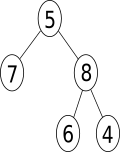

### Travail à réaliser

1. Écrire en python ce dictionnaire **arbre**.
2. Écrire en Python la fonction **taille** qui prend en paramètre un arbre binaire et renvoie le nombre de noeuds qu'il contient.
3. Faire de même avec la fonction **hauteur** et **niveau**.
4. Écrire en Python les fonctions de parcours en profondeur et en largeur d'un arbre binaire.

In [2]:
#arbre = [5,[7,[],[]],[8,[6,[],[]],[4,[],[]]]]
arbre = [5,[7,None,None],[8,[6,None,None],[4,None,None]]]

def est_vide(arbre):
    return arbre == None

def taille(arbre):
    if est_vide(arbre):
        return 0
    else:
        return 1 + taille(arbre[1]) + taille(arbre[2])

def hauteur(arbre):
    if est_vide(arbre): # ou arbre == []
        return -1
    else:
        return 1 + max(hauteur(arbre[1]), hauteur(arbre[2]))

    
def niveau(arbre,p,noeuds=[]):
    if p == 0:
        if arbre[0] is not None:
            noeuds.append(arbre[0])
        return noeuds
    else:
        if arbre[1] is not None:
            niveau(arbre[1],p-1,noeuds)
        if arbre[2] is not None:
            niveau(arbre[2],p-1,noeuds)
        return noeuds

print("Taille:", taille(arbre))
print("Hauteur:", hauteur(arbre))
for i in range(hauteur(arbre)+1):
    print("Niveau %s: %s" % (i,niveau(arbre,i,[])))

Taille: 5
Hauteur: 2
Niveau 0: [5]
Niveau 1: [7, 8]
Niveau 2: [6, 4]


In [8]:
def parcours_infixe(arbre,p=""):
    if not est_vide(arbre):
        p = parcours_infixe(arbre[1],p)
        p += str(arbre[0])
        p = parcours_infixe(arbre[2],p)
    return p

def parcours_prefixe(arbre,p=""):
    if not est_vide(arbre):
        p += str(arbre[0])
        p = parcours_prefixe(arbre[1],p)
        p = parcours_prefixe(arbre[2],p)
    return p

def parcours_suffixe(arbre,p=""):
    if not est_vide(arbre):
        p = parcours_suffixe(arbre[1],p)
        p = parcours_suffixe(arbre[2],p)
        p += str(arbre[0])
    return p
        
print("1/ parcours infixe :",parcours_infixe(arbre))
print("2/ parcours préfixe :", parcours_prefixe(arbre))
print("3/ parcours suffixe :", parcours_suffixe(arbre))

1/ parcours infixe : 75684
2/ parcours préfixe : 57864
3/ parcours suffixe : 76485


In [9]:
from file import creer_file

def parcours_largeur(arbre):
    parcours = ""
    F = creer_file()
    F.enfiler(arbre)
    while not F.est_vide():
        arbre = F.defiler()
        if not est_vide(arbre):
            parcours += str(arbre[0])
            if not est_vide(arbre[1]):
                F.enfiler(arbre[1])
            if not est_vide(arbre[2]):
                F.enfiler(arbre[2])
    return parcours

print("4/ parcours en largeur : ",parcours_largeur(arbre))

4/ parcours en largeur :  57864


In [10]:
a_3 = ['A',\
       ['B',['D',['H',None,None],['I',None,None]],['E',['J',None,None],None]],\
       ['C',['F',None,None],['G',None,None]]\
      ]
       

print("Taille:", taille(a_3))
print("Hauteur:", hauteur(a_3))
for i in range(hauteur(a_3)+1):
    print("Niveau %s: %s" % (i,niveau(a_3,i,[])))
    
print("1/ parcours infixe :",parcours_infixe(a_3))
print("2/ parcours préfixe :", parcours_prefixe(a_3))
print("3/ parcours suffixe :", parcours_suffixe(a_3))

print("4/ parcours en largeur : ",parcours_largeur(a_3))

Taille: 10
Hauteur: 3
Niveau 0: ['A']
Niveau 1: ['B', 'C']
Niveau 2: ['D', 'E', 'F', 'G']
Niveau 3: ['H', 'I', 'J']
1/ parcours infixe : HDIBJEAFCG
2/ parcours préfixe : ABDHIEJCFG
3/ parcours suffixe : HIDJEBFGCA
4/ parcours en largeur :  ABCDEFGHIJ


## En supplément

Pour finir, écrire une fonction qui convertit un arbre défini par une liste ou un dictionnaire en objet implémenté par les classes Noeud et Arbre.

### Travail à réaliser

1. Il faut modifier la fonction **est_vide** pour qu'elle puisse tester un arbre en liste ou en dictionnaire.
2. Créer une fonction **convertir_en_noeud** qui prend en paramètre un arbre (liste, dictionnaire) et renvoie le même arbre en objet **Noeud**.
3. Créer une fonction **convertir** qui prend en paramètre un objet **Noeud** et renvoie un objet **Arbre**.
4. Vérifier vos fonctions avec les arbres définis ci-dessus et on les afficher.

In [1]:
from arbre_binaire import Arbre, Noeud
from draw_arbre import afficher

def est_vide(arbre):
    if type(arbre) == dict:
        return arbre == {}
    else:
        return arbre == None

def convertir_en_noeud(arbre):
    if type(arbre) == list:
        c,g,d = 0,1,2
    else:
        c,g,d = 'clef','gauche','droit'        
    if est_vide(arbre):
        return Noeud()
    else:
        if not est_vide(arbre[g]) and not est_vide(arbre[d]):
            return Noeud(arbre[c],convertir_en_noeud(arbre[g]),convertir_en_noeud(arbre[d]))
        elif not est_vide(arbre[g]):
            return Noeud(arbre[c],convertir_en_noeud(arbre[g]),None)
        elif not est_vide(arbre[d]):
            return Noeud(arbre[c],None,convertir_en_noeud(arbre[d]))
        else:
            return Noeud(arbre[c],None,None)

def convertir(arbre):
    return Arbre(convertir_en_noeud(arbre))

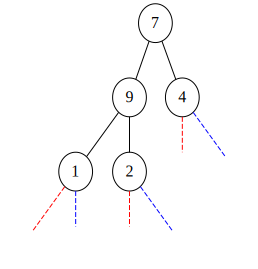

In [2]:
arbre={'clef':7, \
       'gauche':{'clef':9, \
                 'gauche':{'clef':1,'gauche':{},'droit':{}}, \
                 'droit':{'clef':2,'gauche':{},'droit':{}} }, \
       'droit':{'clef':4,'gauche':{},'droit':{}}}

obj_arbre=convertir(arbre)
afficher(obj_arbre)

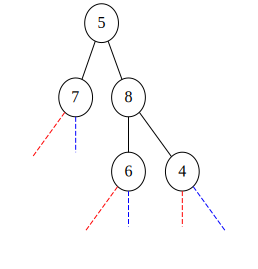

In [3]:
arbre1 = [5,[7,None,None],[8,[6,None,None],[4,None,None]]]

obj_arbre=convertir(arbre1)
afficher(obj_arbre)

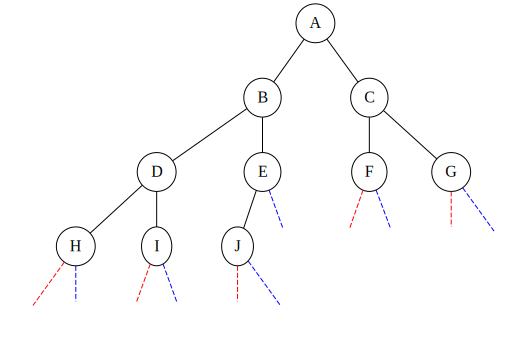

In [4]:
a_3 = ['A',\
       ['B',['D',['H',None,None],['I',None,None]],['E',['J',None,None],None]],\
       ['C',['F',None,None],['G',None,None]]\
      ]

obj_arbre=convertir(a_3)
afficher(obj_arbre)

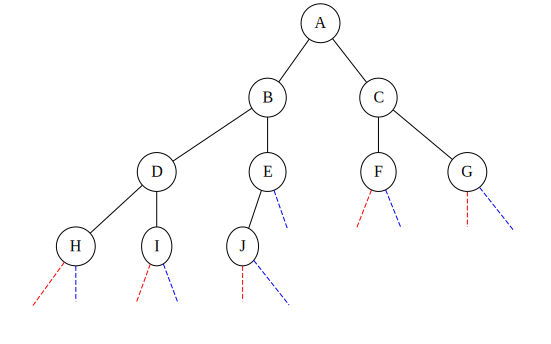

In [5]:
a_2={'clef':'A', \
     'gauche':{'clef':'B', \
               'gauche':{'clef':'D',\
                           'gauche':{'clef':'H',\
                                     'gauche':{},\
                                     'droit':{}},\
                           'droit':{'clef':'I',\
                                     'gauche':{},\
                                     'droit':{}},\
                         },\
               'droit':{'clef':'E',\
                        'gauche':{'clef':'J',\
                                   'gauche':{},\
                                   'droit':{}},\
                        'droit':{},\
                       }, \
                },\
     'droit':{'clef':'C',\
              'gauche':{'clef':'F' ,\
                        'gauche':{},\
                        'droit' :{}\
                         },\
              'droit':{'clef': 'G' ,\
                       'gauche':{} ,\
                       'droit' :{}\
                      },\
             }\
            
    }

obj_arbre=convertir(a_2)
afficher(obj_arbre)